Импортирование библиотек

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

Загрузка очищенного датасета

In [7]:
# Загрузка данных
data = pd.read_csv('cleanedTrain.csv')  # Замените на ваш файл с данными

Обучение модели

In [8]:
# Предполагается, что у вас есть столбец 'target' с метками классов
X = data.drop(columns=['target'])  # Признаки
y = data['target']  # Целевой столбец

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Инициализация модели
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Оценка модели на тестовой выборке
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


# Сохранение обученной модели
joblib.dump(model, 'trained_model.pkl')

Accuracy: 0.98


['trained_model.pkl']

Применение модели

In [9]:
# Подготовка данных для предсказания (удаление целевого столбца, если он есть)
X_new = data.drop(columns=['target'], errors='ignore')  # Удалите 'target', если есть

# Применение модели для предсказания вероятностей
data['score'] = model.predict_proba(X_new)[:,1]  # Вероятности для класса 1

# Сохранение результатов в новый CSV файл
data.to_csv('scoresTrain.csv', index=False)


# Подсчет количества признаков target с значением 1
count_target_1 = (data['target'] == 1).sum()

# Подсчет количества признаков score с значением >= 0.5
count_score_ge_0_5 = (data['score'] >= 0.5).sum()

# Вывод результатов
print(f'Количество признаков target с значением 1: {count_target_1}')
print(f'Количество признаков score с значением >= 0.5: {count_score_ge_0_5}')


Количество признаков target с значением 1: 409
Количество признаков score с значением >= 0.5: 388


Метрика ROC AUC

ROC AUC: 0.9630481747354813
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2584
           1       0.79      0.60      0.68        91

    accuracy                           0.98      2675
   macro avg       0.89      0.80      0.84      2675
weighted avg       0.98      0.98      0.98      2675



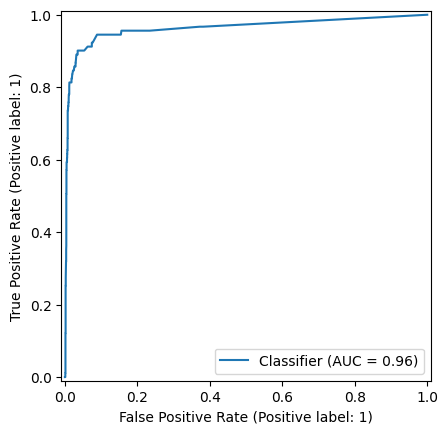

In [10]:
# Для расчета ROC-AUC на тестовых данных
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Рассчет ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {roc_auc}')

# Отчет классификации
print(classification_report(y_test, y_pred))

# Строим график ROC
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.show()